# Lindsey's Pokemon Card Analysis

Imported with `nightmare.js` and based on [Mavin](https://mavin.io) ebay price listings. Prices are in cents.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 9]
plt.rcParams['font.size'] = 18

In [2]:
# load the table of completed cards from the database as a dataframe
conn = sqlite3.connect('./cards.db')
df = pd.read_sql_query("SELECT * from Cards WHERE unit_price_avg IS NOT NULL", conn)
conn.close()

In [3]:
# check that our dataframe has loaded properly
df.head()

,name,identifier,quantity,unknown,url,unit_price_avg,unit_price_min,unit_price_max
0,Parasect,35/64,1,0,https://mavin.io/search?q=Parasect%2035%2F64,892.0,55.0,8311.0
1,Paras,47/64,1,0,https://mavin.io/search?q=Paras%20%2047%2F64,393.0,25.0,8739.0
2,Oddish,68/111,3,0,https://mavin.io/search?q=Oddish%2068%2F111,306.0,15.0,1084.0
3,Erika's Oddish,78/132,1,0,https://mavin.io/search?q=Erika's%20Oddish%207...,452.0,99.0,6200.0
4,Paras,59/64,1,0,https://mavin.io/search?q=Paras%2059%2F64,506.0,1.0,18995.0


In [4]:
print(f'{df.shape[0]} rows total.')

207 rows total.


## Summary statistics

In [5]:
total_avg_price = sum(df.unit_price_avg * df.quantity)
total_min_price = sum(df.unit_price_min * df.quantity)
total_max_price = sum(df.unit_price_max * df.quantity)

print(f'''
Average price: ${total_avg_price/100}
Minimum price: ${total_min_price/100}
Maximum price: ${total_max_price/100}
''')


Average price: $2474.1
Minimum price: $181.21
Maximum price: $38695.07



In [6]:
# Top 10 cards
print('Top 10 cards')
df.sort_values('unit_price_avg', ascending=False).head(10)

Top 10 cards


,name,identifier,quantity,unknown,url,unit_price_avg,unit_price_min,unit_price_max
167,eevee,74/110,2,0,https://mavin.io/search?q=eevee%2074%2F110,8151.0,99.0,44999.0
115,Ninetales,17/110,1,0,https://mavin.io/search?q=Ninetales%2017%2F110,5625.0,425.0,32995.0
131,Dark Houndoom,7/105,1,0,https://mavin.io/search?q=Dark%20Houndoom%207%...,5292.0,99.0,71000.0
114,vulpix,98/110,2,0,https://mavin.io/search?q=vulpix%2098%2F110,5053.0,275.0,21495.0
138,magneton,28/110,1,0,https://mavin.io/search?q=magneton%2028%2F110,3328.0,99.0,13399.0
127,electrode,22/110,1,0,https://mavin.io/search?q=electrode%2022%2F110,3284.0,99.0,33149.0
60,Politoed,8/75,1,0,https://mavin.io/search?q=Politoed%208%2F75,3127.0,500.0,22750.0
29,Nidorino,56/110,1,0,https://mavin.io/search?q=Nidorino%2056%2F110,3108.0,89.0,40000.0
159,Unknown B,39/64,1,0,https://mavin.io/search?q=Unknown%20B%2039%2F64,2911.0,200.0,7990.0
166,raticate,61/110,1,0,https://mavin.io/search?q=raticate%2061%2F110,2803.0,99.0,4313.0


In [7]:
# Bottom 10 cards
print('Bottom 10 cards')
df.sort_values('unit_price_avg', ascending=True).head(10)

Bottom 10 cards


,name,identifier,quantity,unknown,url,unit_price_avg,unit_price_min,unit_price_max
183,farfetch'd,40/130,1,0,https://mavin.io/search?q=farfetch'd%2040%2F130,230.0,1.0,4307.0
77,Sandshrew,91/130,1,0,https://mavin.io/search?q=Sandshrew%2091%2F130,245.0,29.0,3270.0
173,Fuschia City Gym,114/132,1,0,https://mavin.io/search?q=Fuschia%20City%20Gym...,281.0,99.0,99.0
63,Quagsire,48/64,1,0,https://mavin.io/search?q=Quagsire%2048%2F64,284.0,1.0,9950.0
15,Zubat,70/82,1,0,https://mavin.io/search?q=Zubat%20%2070%2F82,294.0,1.0,6700.0
160,Unknown L,86/105,2,0,https://mavin.io/search?q=Unknown%20L%2086%2F105,299.0,299.0,299.0
180,professor elm,96/111,1,0,https://mavin.io/search?q=professor%20elm%2096...,306.0,1.0,707.0
2,Oddish,68/111,3,0,https://mavin.io/search?q=Oddish%2068%2F111,306.0,15.0,1084.0
185,Energy Search,59/62,1,0,https://mavin.io/search?q=Energy%20Search%2059...,306.0,1.0,7499.0
94,Machop,59/82,1,0,https://mavin.io/search?q=Machop%2059%2F82,308.0,10.0,9000.0


In [8]:
df.describe()

,quantity,unknown,unit_price_avg,unit_price_min,unit_price_max
count,207.000000,207.0,207.000000,207.000000,207.000000
mean,1.178744,0.0,985.777778,80.478261,15345.304348
std,0.567683,0.0,983.231999,136.144477,14459.981144
min,1.000000,0.0,230.000000,1.000000,99.000000
25%,1.000000,0.0,411.000000,8.000000,6000.000000
50%,1.000000,0.0,647.000000,55.000000,10250.000000
75%,1.000000,0.0,1203.000000,99.000000,21272.500000
max,6.000000,0.0,8151.000000,1499.000000,85000.000000


## Price Histograms

### Average price

<AxesSubplot:xlabel='unit_price_avg', ylabel='Count'>

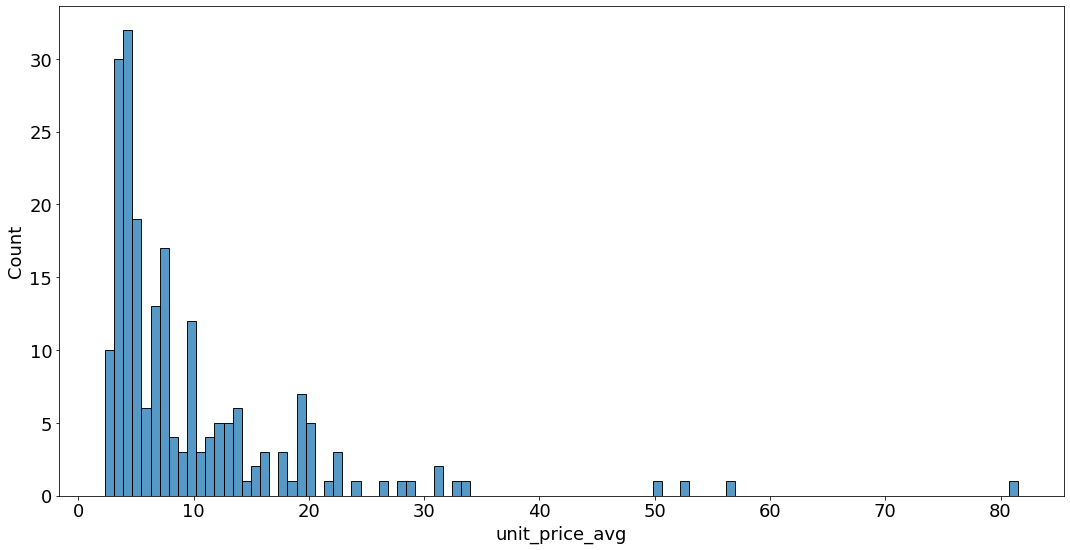

In [9]:
seaborn.histplot(df.unit_price_avg/100, bins=100)

### Min price

<AxesSubplot:xlabel='unit_price_min', ylabel='Count'>

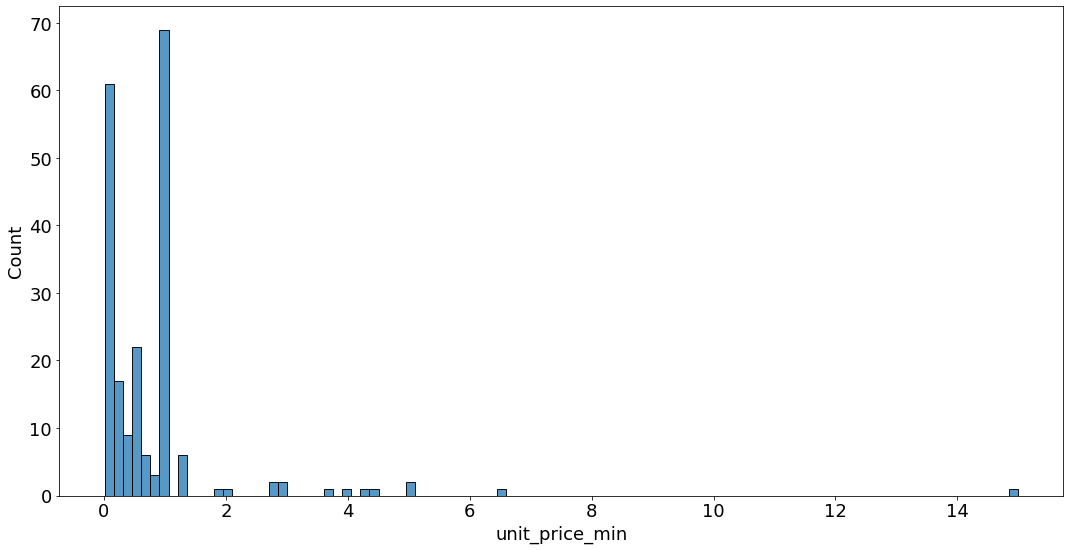

In [10]:
seaborn.histplot(df.unit_price_min/100, bins=100)

### Max price

<AxesSubplot:xlabel='unit_price_max', ylabel='Count'>

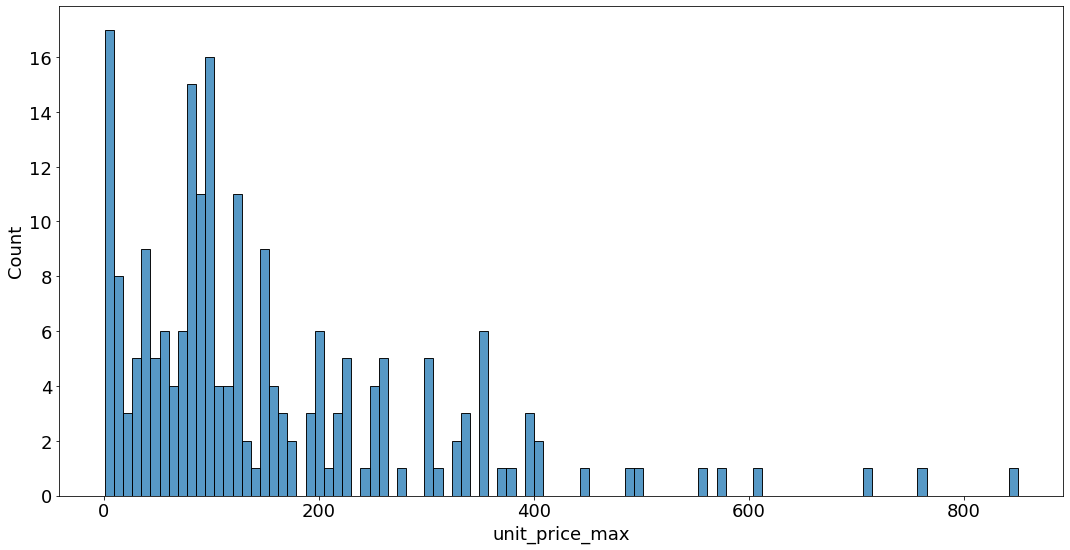

In [11]:
seaborn.histplot(df.unit_price_max/100, bins=100)